# Problem:
In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

### Heart Disease Dataset Variable Description

| **Variable** | **Description**                                                                                                      |
| ------------ | -------------------------------------------------------------------------------------------------------------------- |
| `age`        | Age of the patient in years                                                                                          |
| `sex`        | Gender of the patient (0 = male, 1 = female)                                                                         |
| `cp`         | Chest pain type:<br> 0: Typical angina<br> 1: Atypical angina<br> 2: Non-anginal pain<br> 3: Asymptomatic            |
| `trestbps`   | Resting blood pressure (in mm Hg)                                                                                    |
| `chol`       | Serum cholesterol in mg/dl                                                                                           |
| `fbs`        | Fasting blood sugar level > 120 mg/dl (1 = true, 0 = false)                                                          |
| `restecg`    | Resting electrocardiographic results:<br> 0: Normal<br> 1: ST-T wave abnormality<br> 2: Left ventricular hypertrophy |
| `thalach`    | Maximum heart rate achieved during a stress test                                                                     |
| `exang`      | Exercise-induced angina (1 = yes, 0 = no)                                                                            |
| `oldpeak`    | ST depression induced by exercise relative to rest                                                                   |
| `slope`      | Slope of the peak exercise ST segment:<br> 0: Upsloping<br> 1: Flat<br> 2: Downsloping                               |
| `ca`         | Number of major vessels (0–4) colored by fluoroscopy                                                                 |
| `thal`       | Thalium stress test result:<br> 0: Normal<br> 1: Fixed defect<br> 2: Reversible defect<br> 3: Not described          |
| `target`     | Heart disease status (0 = no disease, 1 = presence of disease)                                                       |




# Importing Required Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib


# Machine learning libraries
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,roc_curve

# Read Dataset

In [41]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\CodeClause\HeartDiseasePrediction\Dataset\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data cleaning

In [42]:
df.shape

(303, 14)

Data set contains 303 entries and 14 columns.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int32  
 2   cp        302 non-null    int32  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int32  
 6   restecg   302 non-null    int32  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int32  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int32  
 11  ca        302 non-null    int32  
 12  thal      302 non-null    int32  
 13  target    302 non-null    int32  
dtypes: float64(5), int32(9)
memory usage: 32.9 KB


Based on the data types and the feature explanations we had earlier, we can see that 9 columns (sex, cp, fbs, restecg, exang, slope, ca, thal, and target) are indeed numerical in terms of data type, but categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation.

In [93]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca','thal','target']
for col in cat_cols:
    df[col] = df[col].astype('object')
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

#### Nulll value and Duplicates

In [94]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [95]:
df.duplicated().sum()

57

The data set contains 1 duplicated entry. so we have to drop the duplicates

In [96]:
df.drop_duplicates(inplace=True)
print('how many duplicates after removing:',df.duplicated().sum())

how many duplicates after removing: 0


#### Statistical Analysis

##### i) Checking stastical analysis on numerical columns

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,245.0,0.112449,0.229169,0.05,0.05,0.05,0.05,0.95
trestbps,245.0,0.230000,0.360737,0.05,0.05,0.05,0.05,0.95
chol,245.0,0.174898,0.311778,0.05,0.05,0.05,0.05,0.95
thalach,245.0,0.083061,0.169645,0.05,0.05,0.05,0.05,0.95
oldpeak,245.0,0.185918,0.322922,0.05,0.05,0.05,0.05,0.95


age: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.

trestbps: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.

chol: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.

thalach: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.

oldpeak: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

##### ii) checking statistical analysis for categorical columns

In [98]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,245,245,245,245,245,245,245,245,245
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,0,0,1,0,2,0
freq,174,118,201,128,158,119,131,121,123


sex: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 206 times out of 302 entries.

cp: Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

fbs: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 257 times.

restecg: Three unique results are present. The most common result is "1", appearing 151 times.

exang: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 203 times.

slope: Three unique slopes are present. The most frequent slope type is "2", which occurs 141 times.

ca: There are five unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 175 times.

thal: Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 165 times.

target: Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 164 entries.

### Outlier Treatment

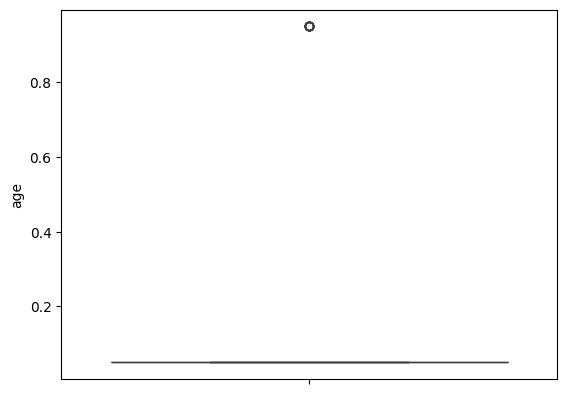

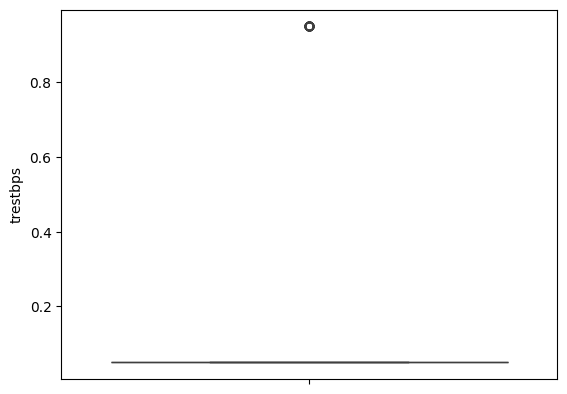

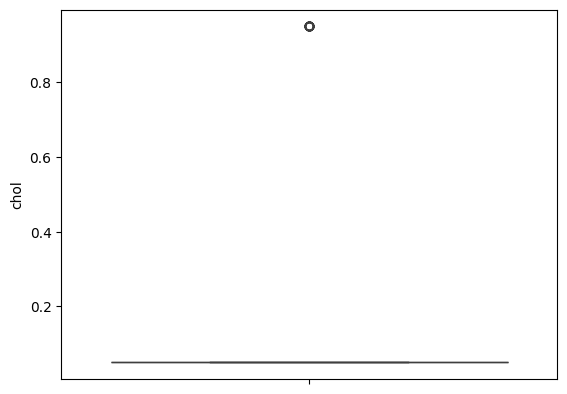

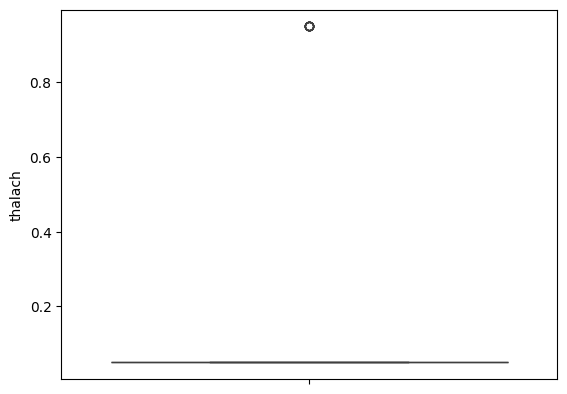

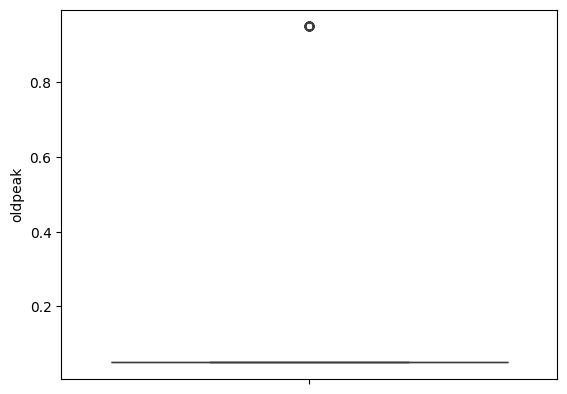

In [99]:
for i in con_var:
    sns.boxplot(df[i])
    plt.show()

In [100]:
### Outlier Treatment

def outlier(df,i):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1

    upper_bound = [q3 - (1.5 * IQR)]
    lower_bound = [q1 + (1.5 * IQR)]


    for j in df.index:
        value = df.loc[j, i]
        if value < lower_bound:
            df.loc[j, i] = 0.05
        elif value > upper_bound:
            df.loc[j, i] = 0.95

    return df


for i in con_var:
    df=outlier(df,i)

# EDA 

### i) Univariate Analysis

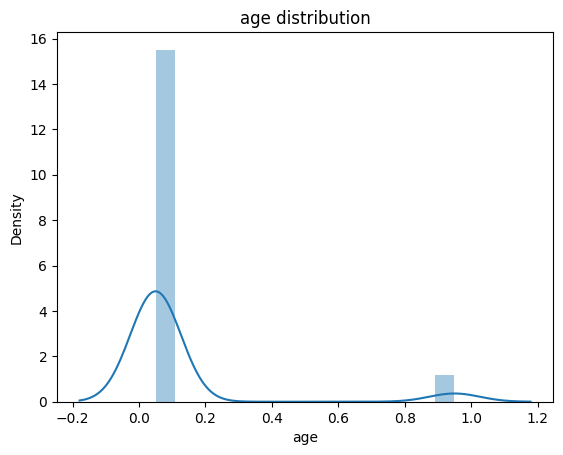

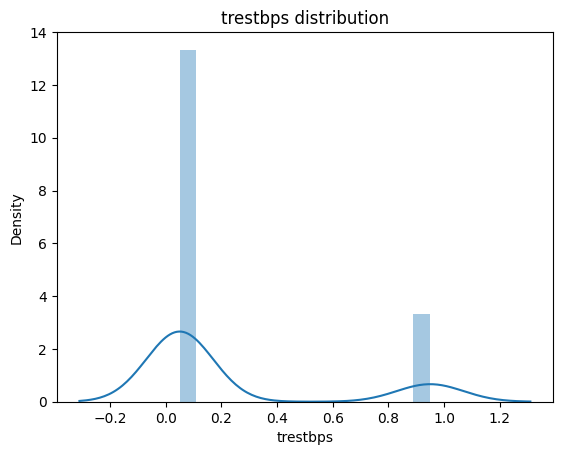

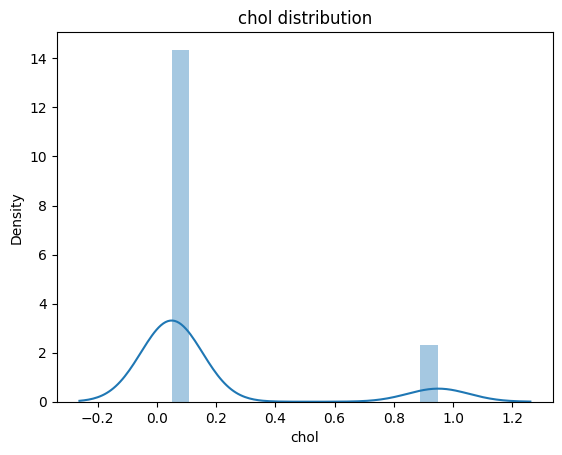

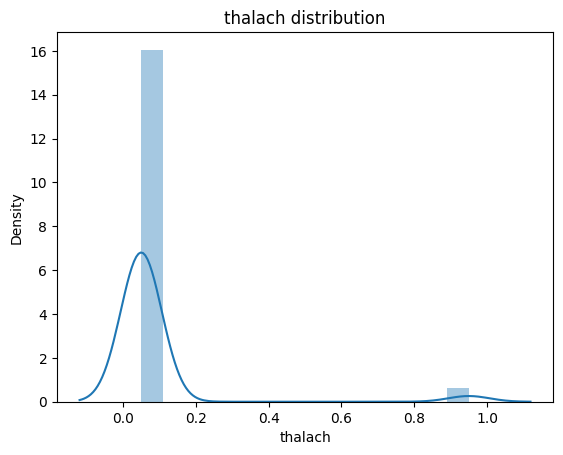

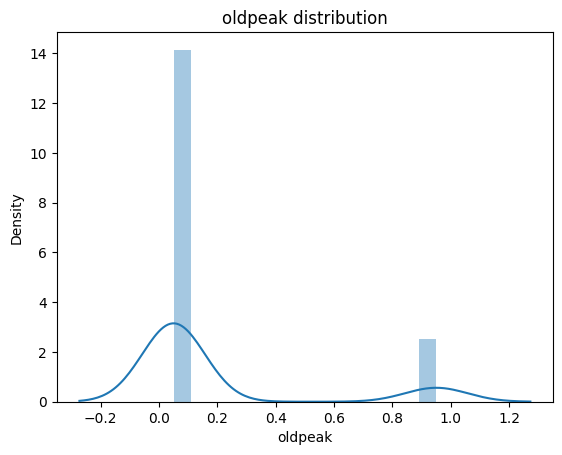

In [101]:
# continues variables
for i in con_var:
    sns.distplot(df[i])
    plt.title(f'{i} distribution')
    plt.show()

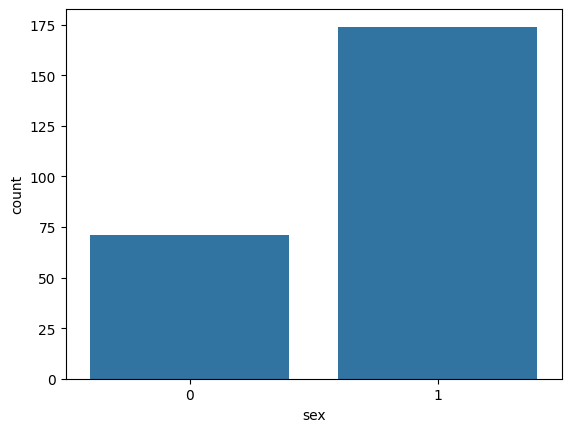

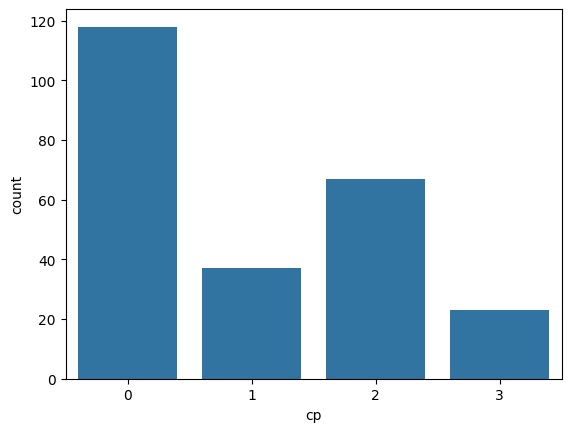

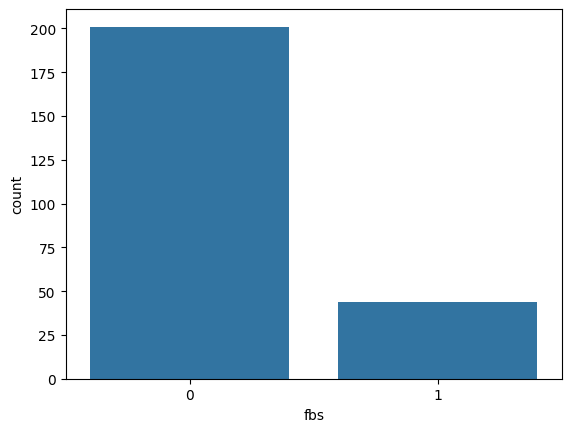

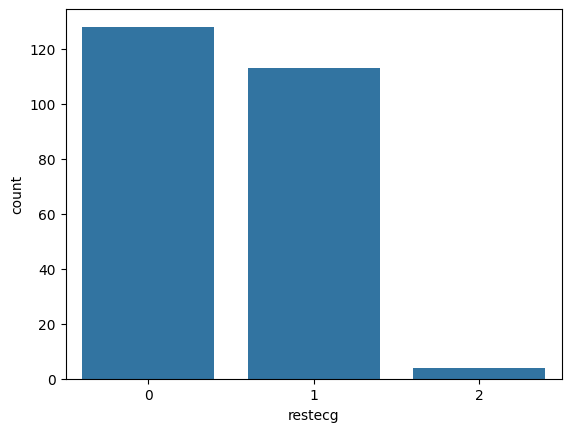

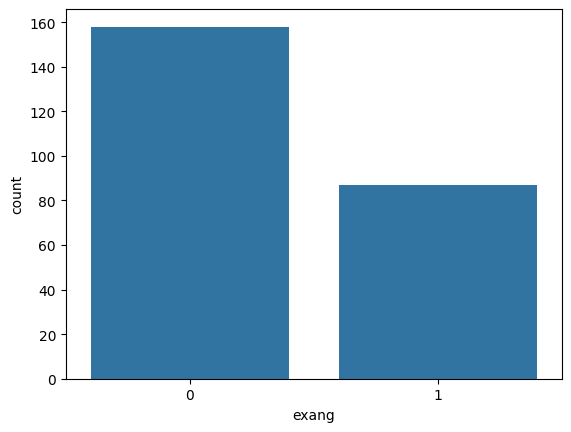

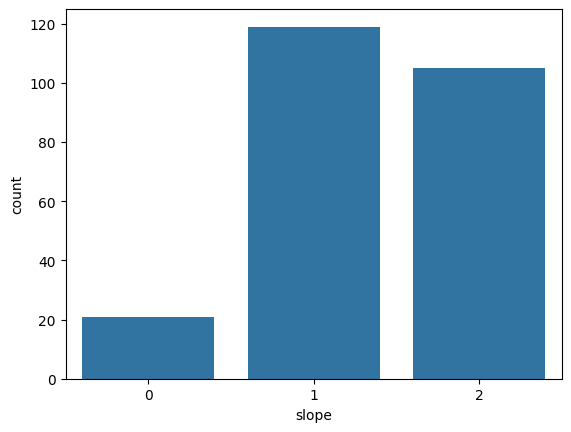

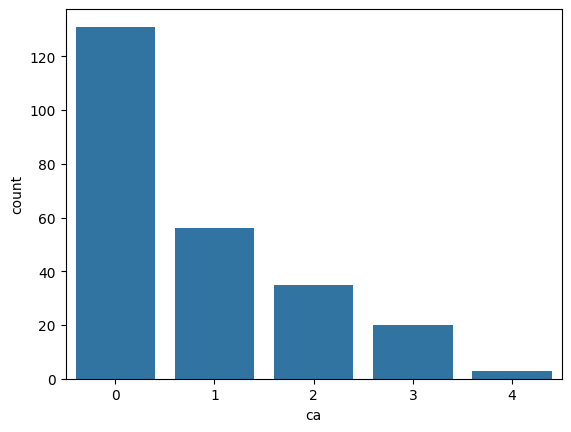

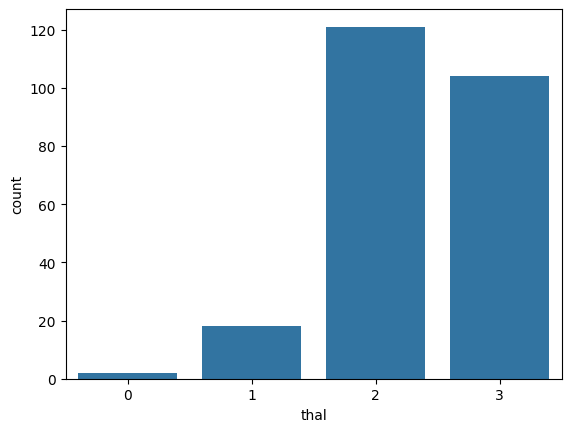

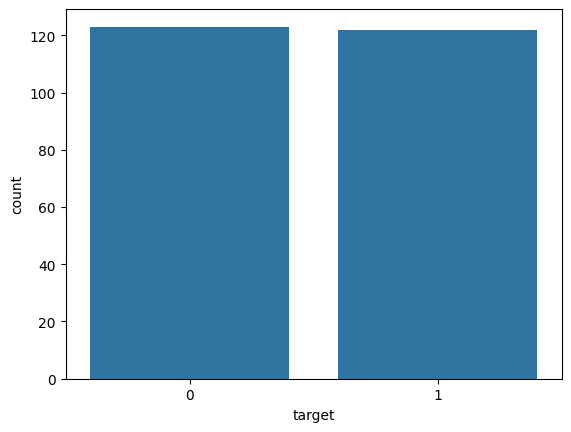

In [102]:
# categorical variable

for i in df.select_dtypes(include='object').columns:
    sns.countplot(data=df,x=df[i])
    plt.show()

### ii) Multi Variate Analysis

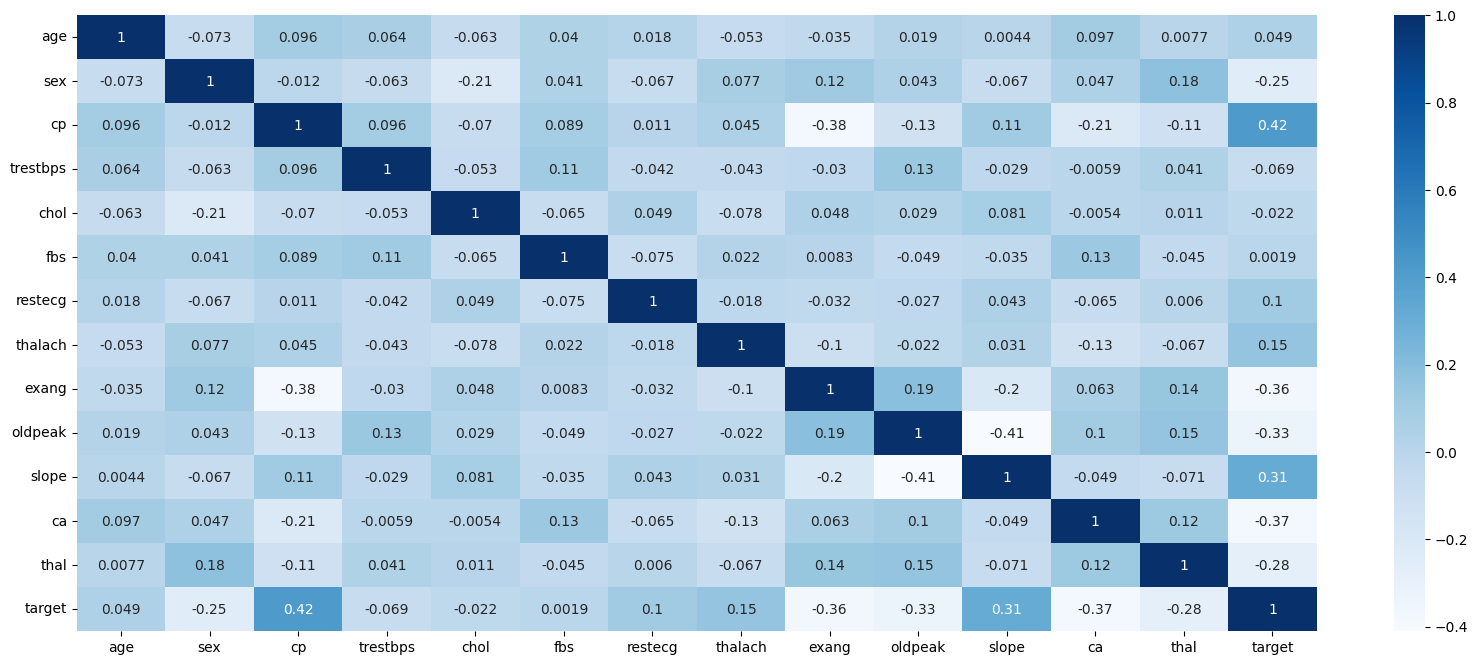

In [103]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

# Data Preprocessing

In [138]:
num_col = ['age','trestbps','chol','thalach','oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca','thal']

df.columns = df.columns.str.strip().str.lower()

x = df.drop('target',axis=1)
y=df[['target']]

In [ ]:
from sklearn.model_selection import train_test_split
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_col),
    ('cat', OneHotEncoder(), cat_cols)
])



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('regressor',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

# Model Bulding

### i) Decision Tree Classifier

In [ ]:
#full pipeline : combine the preprocess and model

pipeline = Pipeline([('preprocessor',preprocessor),
                     ('regressor',DecisionTreeClassifier(max_depth=5, random_state=42))])


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


pipeline.fit(x_train,y_train)

In [145]:
#predict
y_pred = pipeline.predict(x_test)


# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7419354838709677
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.77      0.72      0.74        32

    accuracy                           0.74        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.74      0.74      0.74        62



### ii) XGBoost Classifier

In [150]:
#full pipeline : combine the preprocess and model

pipeline1 = Pipeline([('preprocessor',preprocessor),
                     ('regressor',XGBClassifier(n_estimators=100, 
                                                learning_rate=0.1,
                                                max_depth=5,
                                                random_state=42,
                                                enable_categorical=True))])


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


pipeline1.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('regressor',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytre...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [151]:
y_pred_xgb = pipeline1.predict(x_test)
y_proba_xgb = pipeline1.predict_proba(x_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))
print("\n",classification_report(y_test, y_pred_xgb))
print('\n confusion matrix:\n',confusion_matrix(y_test,y_pred_xgb))


Accuracy: 0.7580645161290323

 ROC AUC Score: 0.8536458333333333

               precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.76      0.78      0.77        32

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.76      0.76      0.76        62


 confusion matrix:
 [[22  8]
 [ 7 25]]


### iii) RandomForestClassifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline with preprocessor and Random Forest model
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42
    ))
])


# Fit the pipeline
pipeline2.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('regressor',
                 RandomForestClassifier(max_depth=5, random_state=42))])

In [161]:
y_pred_rf = pipeline2.predict(x_test)
y_proba_rf = pipeline2.predict_proba(x_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("\n",classification_report(y_test, y_pred_rf))
print('\n confusion matrix:\n',confusion_matrix(y_test,y_pred_rf))


Accuracy: 0.7741935483870968

 ROC AUC Score: 0.8723958333333333

               precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.78      0.78      0.78        32

    accuracy                           0.77        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.77      0.77      0.77        62


 confusion matrix:
 [[23  7]
 [ 7 25]]


### iv) SuperVectorMachine

In [158]:
from sklearn.svm import SVC

# Create the pipeline with preprocessor and SVM model
pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVC(
        kernel='rbf',       
        C=1.0,              
        gamma='scale',       
        probability=True,   
        random_state=42
    ))
])


# Fit the pipeline
pipeline3.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('regressor', SVC(probability=True, random_state=42))])

In [159]:
y_pred_svm = pipeline2.predict(x_test)
y_proba_svm = pipeline2.predict_proba(x_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))
print("\n",classification_report(y_test, y_pred_svm))
print('\n confusion matrix:\n',confusion_matrix(y_test,y_pred_svm))


Accuracy: 0.7741935483870968

 ROC AUC Score: 0.8723958333333333

               precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.78      0.78      0.78        32

    accuracy                           0.77        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.77      0.77      0.77        62


 confusion matrix:
 [[23  7]
 [ 7 25]]


# Model Deployment

"After evaluating multiple classification models including Decision Tree, Random Forest, and XGBoost, the Support Vector Machine (SVM) classifier was selected for deployment due to its superior performance and consistent accuracy in predicting heart disease risk on the test data."

In [157]:
joblib.dump(pipeline3,"HeartDisease_svm_model.pkl")

['HeartDisease_svm_model.pkl']